# Predicting Student Exam Scores (Linear Regression)
## Problem: Predict a student’s exam score based on study hours and attendance percentage.
- Machine Learning Method: Linear Regression
- Performance Metric: Mean Squared Error (MSE)
- Visualization:
    - Scatter plot with regression line
    - Bar chart comparing predicted vs. actual scores

In [47]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np

In [48]:
dataframe = pd.read_csv('Expanded_data_with_more_features.csv')

In [49]:
print(dataframe.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [50]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


# Handling Missing Data

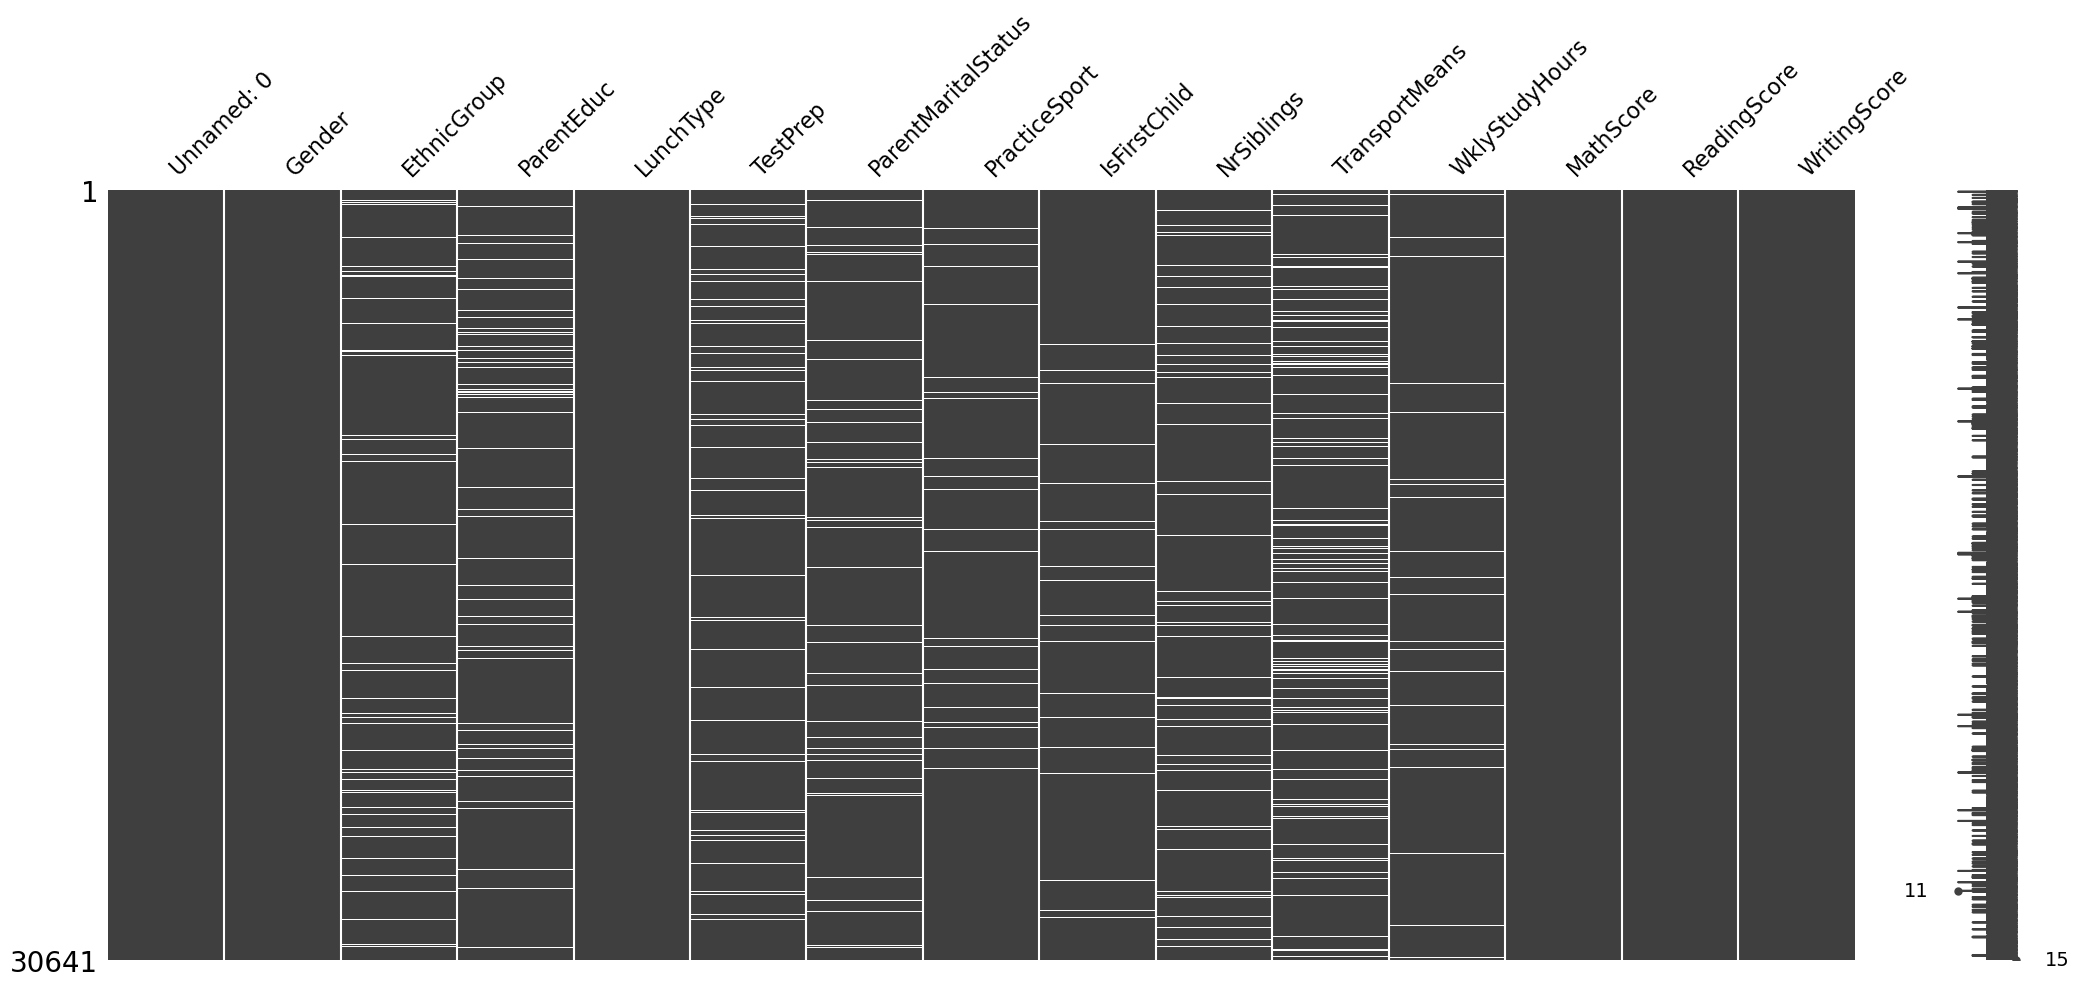

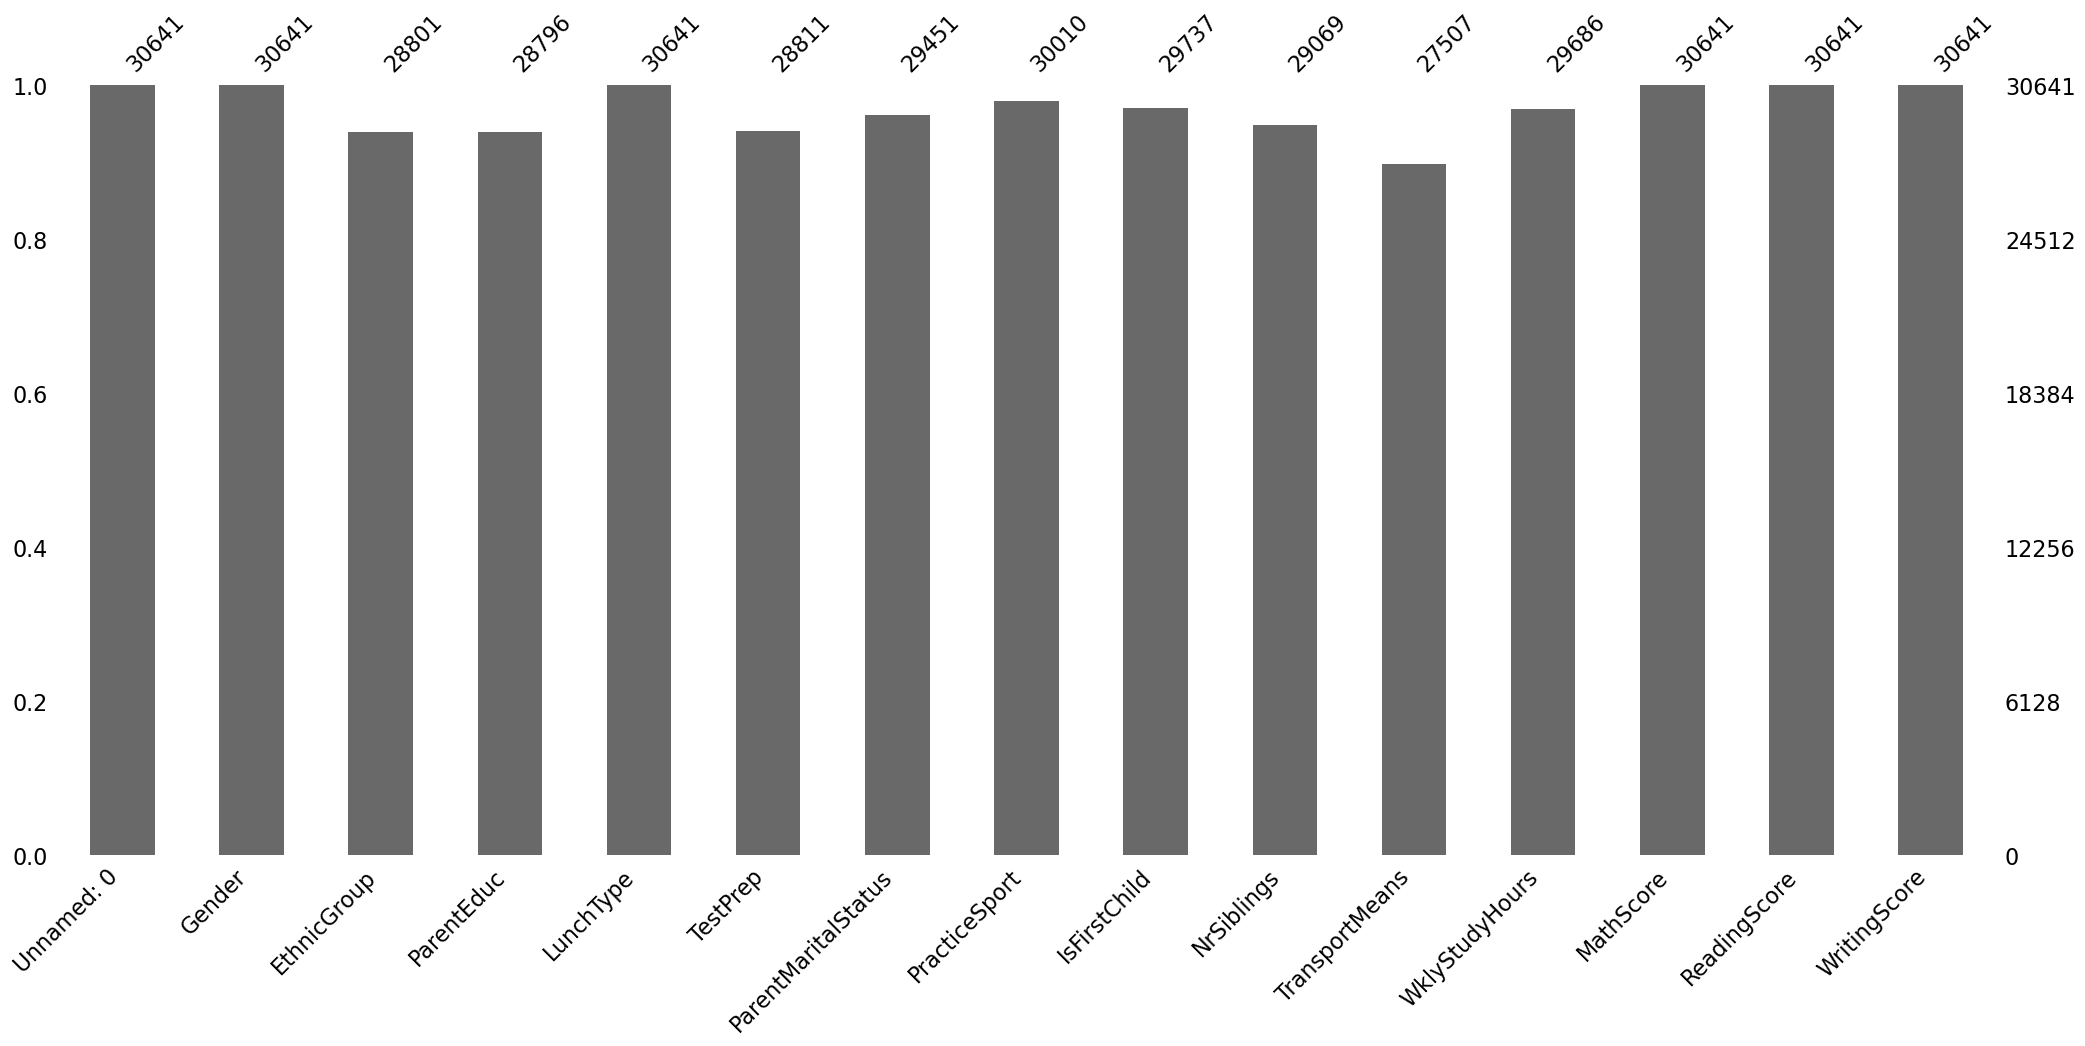

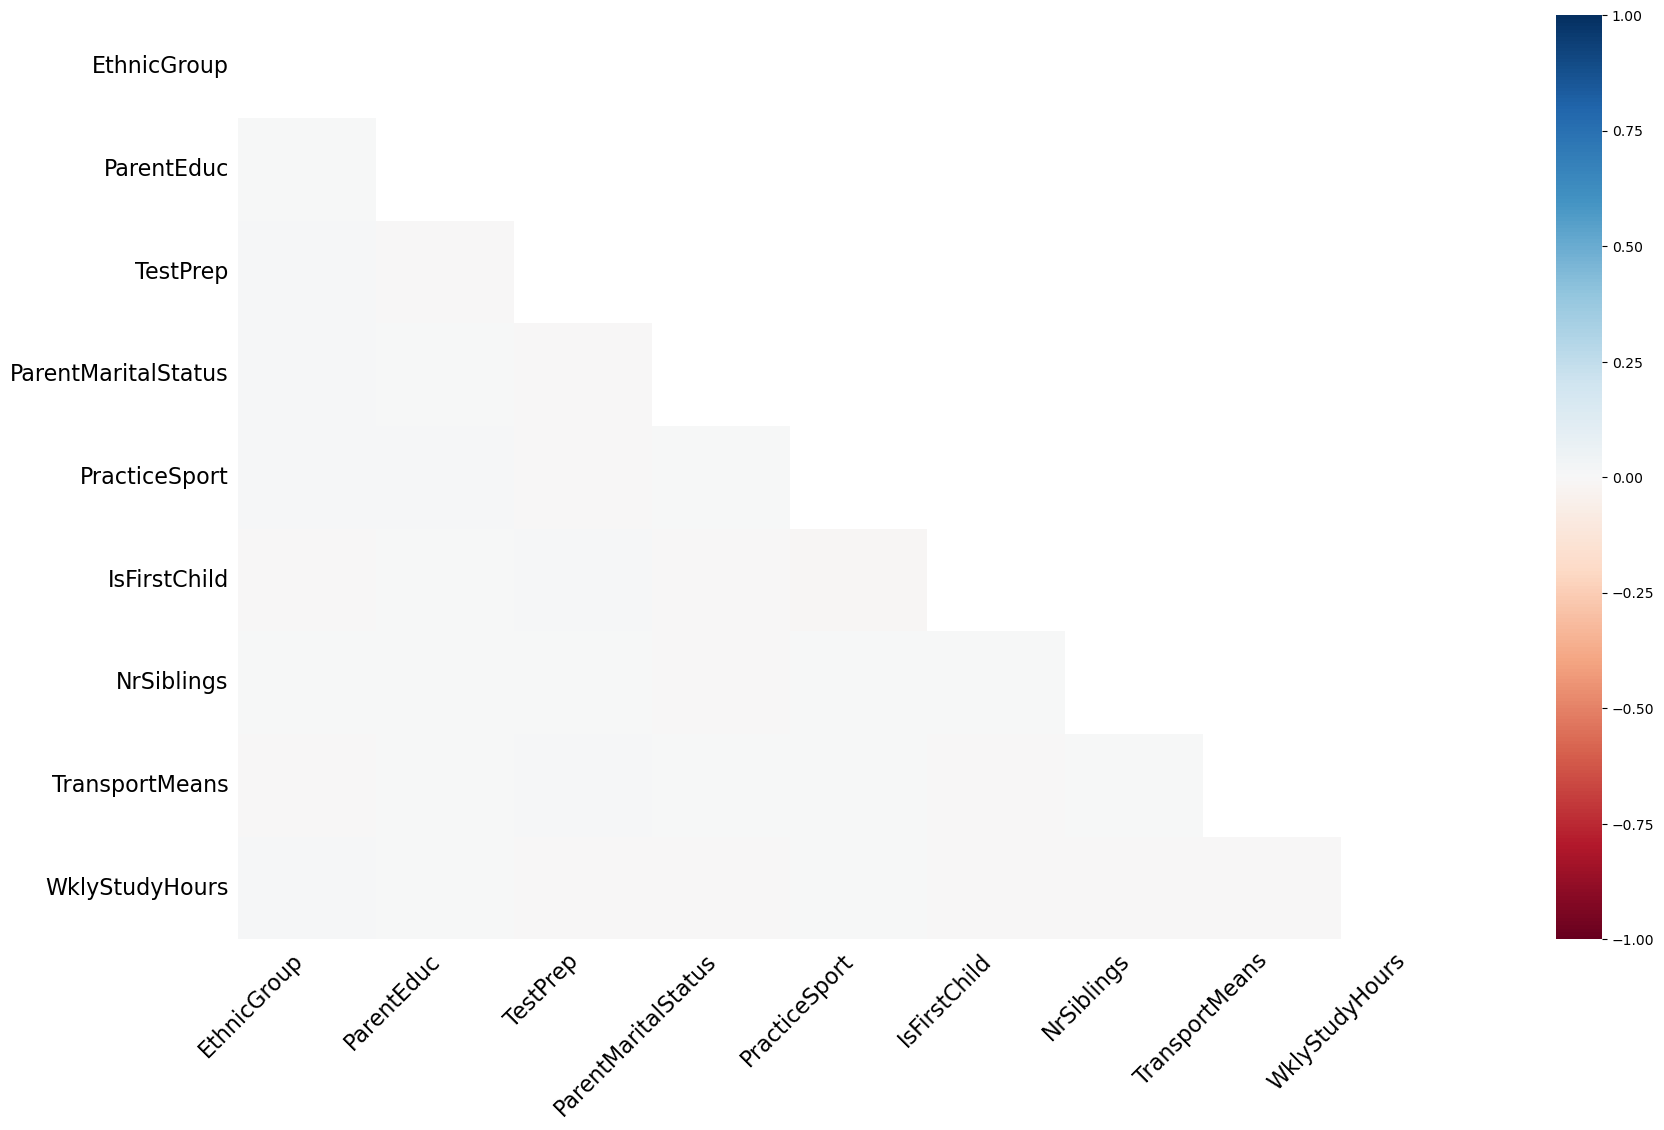

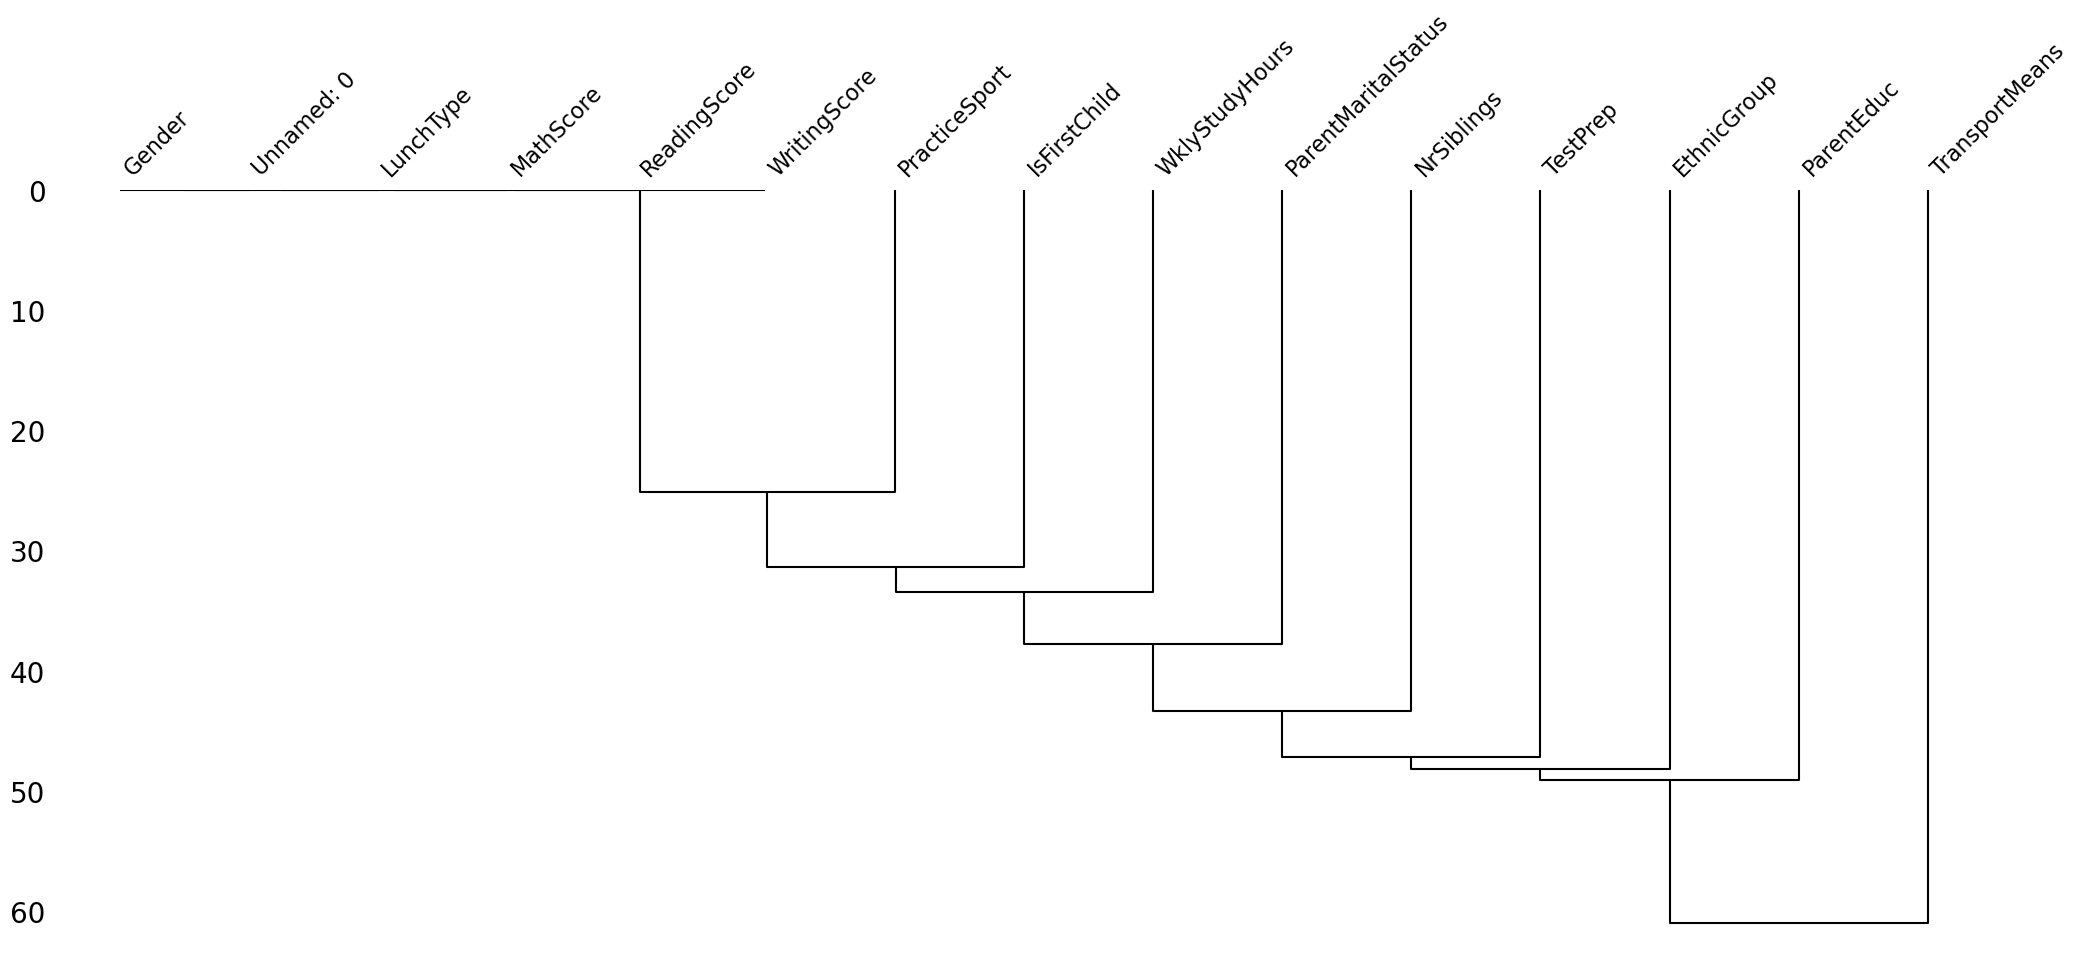

In [51]:
# Shows where the missing data is 
msno.matrix(dataframe)
plt.show()

msno.bar(dataframe)
plt.show()

msno.heatmap(dataframe)
plt.show()

msno.dendrogram(dataframe)
plt.show()

In [52]:
# Total number of rows is 30641
print(dataframe.isnull().sum())

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64


Based on the heatmap and dendrogram pointing towards a near-MCAR (Missing completely at random), and considering the significant amount of missing data in several columns:
- "Unknown" Category + Simple Imputation
    - `NrSiblings` -> median
    - Impute all categorical columns with missing values with the string "Unknown" 

In [54]:
dataframe['NrSiblings'].fillna(dataframe['NrSiblings'].median(), inplace=True)

categorical_cols = dataframe.select_dtypes(include='object').columns
for col in categorical_cols:
    dataframe[col].fillna('Unknown', inplace=True)

print(dataframe.isnull().sum())

Unnamed: 0             0
Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64


C:\Users\phanb\AppData\Local\Temp\ipykernel_13644\1261863245.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe['NrSiblings'].fillna(dataframe['NrSiblings'].median(), inplace=True)
C:\Users\phanb\AppData\Local\Temp\ipykernel_13644\1261863245.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [ ]:
print(dataframe.isnull().sum())

Unnamed: 0             0
Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

# One-Hot Encoding

In [38]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          30641 non-null  object 
 3   ParentEduc           30641 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             30641 non-null  object 
 6   ParentMaritalStatus  30641 non-null  object 
 7   PracticeSport        30641 non-null  object 
 8   IsFirstChild         30641 non-null  object 
 9   NrSiblings           30641 non-null  float64
 10  TransportMeans       30641 non-null  object 
 11  WklyStudyHours       30641 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [57]:
df_encoded = pd.get_dummies(dataframe, drop_first=True ,dtype='uint8')
df_encoded['NrSiblings'] = df_encoded['NrSiblings'].astype('uint8')
display(df_encoded.head())

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore,Gender_male,EthnicGroup_group A,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,...,PracticeSport_never,PracticeSport_regularly,PracticeSport_sometimes,IsFirstChild_no,IsFirstChild_yes,TransportMeans_private,TransportMeans_school_bus,WklyStudyHours_< 5,WklyStudyHours_> 10,WklyStudyHours_Unknown
0,0,3,71,71,74,0,0,0,0,0,...,0,1,0,0,1,0,1,1,0,0
1,1,0,69,90,88,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
2,2,4,87,93,91,0,0,1,0,0,...,0,0,1,0,1,0,1,1,0,0
3,3,1,45,56,42,1,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,4,0,76,78,75,1,0,0,1,0,...,0,0,1,0,1,0,1,0,0,0


In [58]:
print(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Unnamed: 0                     30641 non-null  int64
 1   NrSiblings                     30641 non-null  uint8
 2   MathScore                      30641 non-null  int64
 3   ReadingScore                   30641 non-null  int64
 4   WritingScore                   30641 non-null  int64
 5   Gender_male                    30641 non-null  uint8
 6   EthnicGroup_group A            30641 non-null  uint8
 7   EthnicGroup_group B            30641 non-null  uint8
 8   EthnicGroup_group C            30641 non-null  uint8
 9   EthnicGroup_group D            30641 non-null  uint8
 10  EthnicGroup_group E            30641 non-null  uint8
 11  ParentEduc_associate's degree  30641 non-null  uint8
 12  ParentEduc_bachelor's degree   30641 non-null  uint8
 13  ParentEduc_high 